<a href="https://colab.research.google.com/github/thkted/DeepLearning_Study/blob/%EB%AA%A8%EB%91%90%EC%9D%98-%EB%94%A5%EB%9F%AC%EB%8B%9D/%EB%AA%A8%EB%91%90%EC%9D%98%EB%94%A5%EB%9F%AC%EB%8B%9D/Lab6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def one_hot(x):
  return np.identity(16)[x:x+1]

In [3]:
env = gym.make('FrozenLake-v0')

In [4]:
# Input and output size based on the Env
input_size = env.observation_space.n
output_size = env.action_space.n

In [5]:
# HyperParameters
dis = 0.99
num_episodes = 2000
lr = 0.1

In [6]:
# These lines establish the feed-forward part of the network used to choose actions
X = tf.placeholder(shape=[1,input_size], dtype=tf.float32) # state input
W = tf.Variable(tf.random_uniform([input_size, output_size], 0, 0.01)) # weight

Qpred = tf.matmul(X, W)
Y = tf.placeholder(shape=[1, output_size], dtype=tf.float32)

loss = tf.reduce_sum(tf.square(Y - Qpred))
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

Percent of successful episodes: 0.4565%


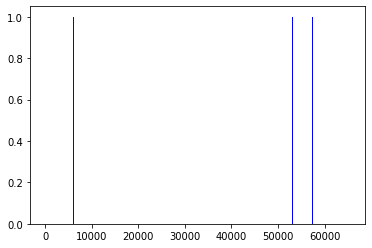

In [8]:
# Create lists to contain total rewards and steps per episodes
rList = []
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for i in range(num_episodes):
    s = env.reset()
    e = 1. / ((i / 50) + 10)
    rAll = 0
    done = False
    local_host = []

    while not done:
      Qs = sess.run(Qpred, feed_dict={X: one_hot(s)})
      if np.random.random(1) < e:
        a = env.action_space.sample()
      else:
        a = np.argmax(Qs)
      
      s1, reward, done, _ = env.step(a)

      if done:
        Qs[0, a] = reward
      else:
        Qs1 = sess.run(Qpred, feed_dict={X: one_hot(s1)})
        Qs[0, a] = reward + dis * np.max(Qs1) # target (y)
      
      sess.run(train, feed_dict={X: one_hot(s), Y: Qs})
      rAll += reward
      s = s1
      rList.append(rAll)

print('Percent of successful episodes: ' + str(sum(rList) / num_episodes) + '%')
plt.bar(range(len(rList)), rList, color='blue')
plt.show()

